# DNN (Deep Neural Network)


## 유닛/노드/뉴런 (Unit, Node, Neuron)
- Tensor를 입력받아 tensor를 출력하는 데이터 처리 모듈 
    - Input -> Output
- 입력 값에 Weight(가중치)를 곱하고 bias(편향)을 더한 뒤 활성화 함수를 거처 출력한다.
- 하나의 노드 구성
    
    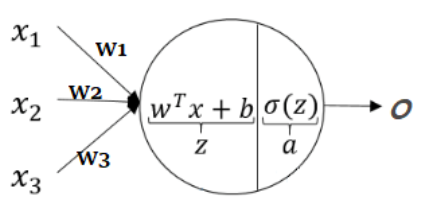
    - Input vector: $\mathbb x=(x_1, x_2, x_3)^T$
    - Weights: $\mathbb w = (w_1, w_2, w_3)^T$
    - Bias: $ b \in \mathbb R$
    - Activation function: $\sigma(\cdot)$
        - 원하는 결과값으로 변환해주는 함수 ( ex) 이진법이라면 0, 1 or 확률이라면 0과 1사이의 값으로)
    
       <center> $z=w_1 x_1 + w_2 x_2 + w_3 x_3 + b \Leftrightarrow z = \mathbb w^T \mathbb x + b$ <br>
       $a=\sigma( z)$  

## 레이어/층(Layer)
- Input Layer: 입력값들을 받아 Hidden Layer에 전달하는 노드들로 구성된 Layer.
- Output Layer: 예측결과를 출력하는 노드들로 구성된 Layer
- Hidden Layer
    - Input Layer와 Output Layer사이에 존재하는 Layer.
- 대부분 Layer들은 가중치를 가짐 (dropout, pooling과 같이 가중치가 없는 layer도 있음) 
- Net(망) : Layer들의 연결
- 많이 사용되는 Layer의 예
    - Fully connected layer (Dense(밀집) layer)
    - Convolution layer 
    - Recurrent layer 
    - Embedding layer 
- Layers : https://www.tensorflow.org/api_docs/python/tf/keras/layers

## 모델 (Network)
- Layer를 쌓아 만드는 네트워크 
- 이전 레이어의 출력을 input으로 받아 output을 주는 층을 순서대로 쌓음 
- 적절한 network 구조(architecture)를 찾는 것은 과학 보다는 예술의 경지! 많은 경험이 필요 
- 기존의 잘 작동한 구조를 기반으로 구현하는 방식으로 접근 

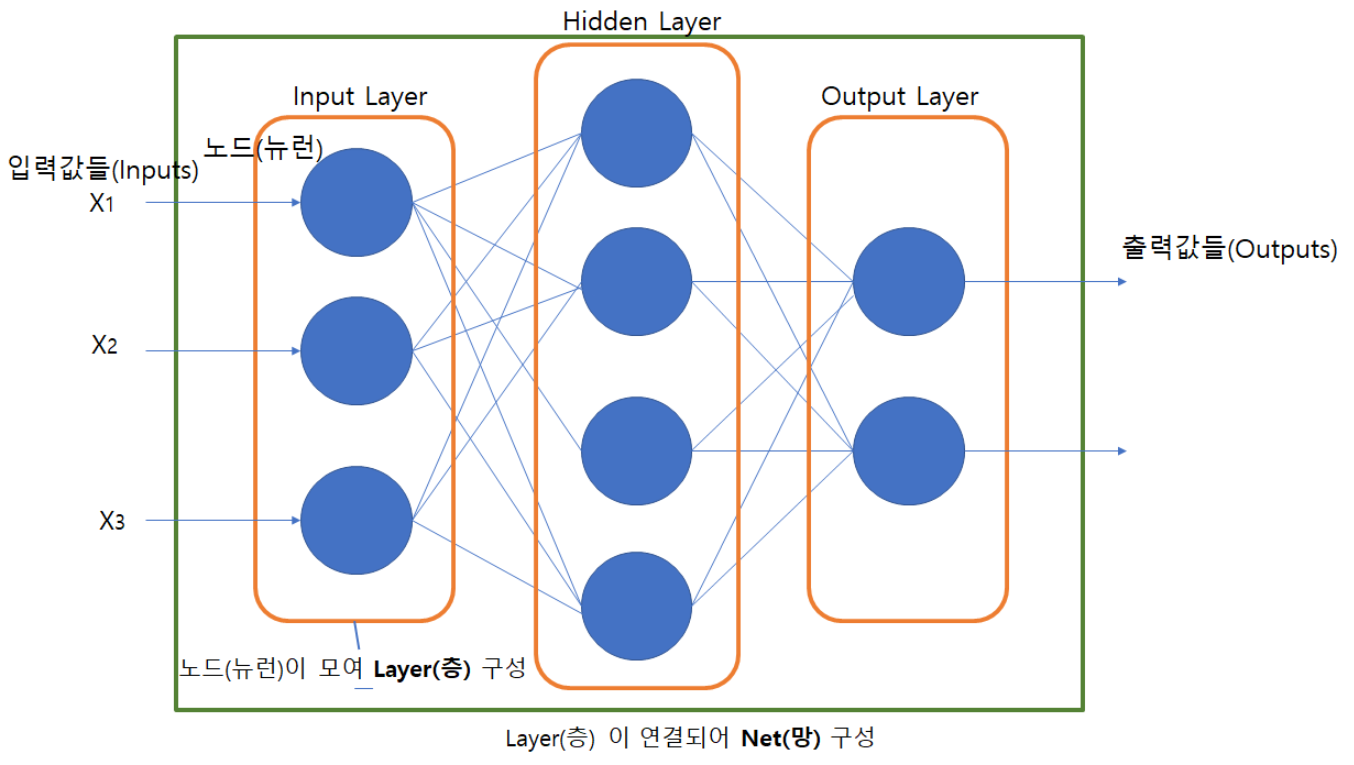

## 딥러닝(Deep Learning)
- 신경망이 많아지면 깊은 딥러닝이라고 한다.

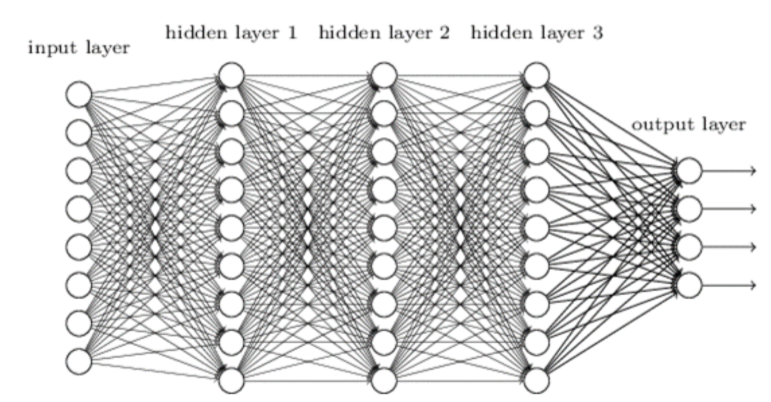

## 손실함수(Loss function, 비용함수)
- Model을 통해 나온 예측값(prediction) $\hat y^{(i)}$와 실제 데이터(output) $y^{(i)}$의 차이를 수량화하는 함수
- 훈련하는 동안 최소화될 값으로 이 값을 바탕으로 파라미터(가중치와 편향)을 업데이트한다.

$$J(w, b)= \frac 1 m \sum_{i=1}^m L(\hat y^{(i)} ,y^{(i)})$$

### 해결하려는 문제의 종류에 따라 표준적인 Loss function이 존재함
- Binary classification (이진 분류)
    - 두 개의 클래스를 분류
    - 예) 문장을 입력하여 긍정/부정 구분
    - **binary_crossentropy**를 loss function으로 사용
    $$ L(\hat y^{(i)} ,y^{(i)}) = - y^{(i)} log(\hat y^{(i)} ) - (1- y^{(i)}) log (1-\hat y^{(i)} )$$

- Multi-class classification (다중 클래스 분류)
    - 두 개 이상의 클래스를 분류 
    - 예) 이미지를 0,1,2,...,9로 구분
    - **categorical_crossentropy**를 loss function으로 사용 
    $$ L(\hat y^{(i)} ,y^{(i)}) = - \sum_{c=1}^C y_c^{(i)} log(\hat y_c^{(i)} ) $$

- Regression (회귀)
    - 연속형 값을 에측 
    - 예) 주가 예측 
    - **Mean squared error**를 loss function으로 사용 
    $$L(\hat y^{(i)} ,y^{(i)}) = \frac  1 2 (\hat y^{(i)} - y^{(i)})^2$$

- https://www.tensorflow.org/api_docs/python/tf/keras/losses

## 평가지표 (Metrics)
- 손실함수와 비슷하나 다른 점은 모델을 학습할 때 가중치 업데이트를 위해 사용되지 않는다. 
    - 손실함수의 결과는 가중치 업데이트를 위해 사용한다.
- 확인 하기 위한 지표로만 사용한다.

- https://www.tensorflow.org/api_docs/python/tf/keras/metrics

## 활성 함수 (Activation Function)
- 각 유닛이 입력결과를 처리한 후 출력하기 위해 거치는 함수
- 같은 층(layer)의 모든 유닛들은 같은 활성 함수를 가진다.
- 최종 출력 레이어의 경우 문제유형에 따른 표준 활성화 함수가 존재함
- 은닉층 (Hidden Layer)의 경우 **Relu**나 sigmoid 함수를 많이 사용한다. 

### 주요 활성함수(Activation Function)

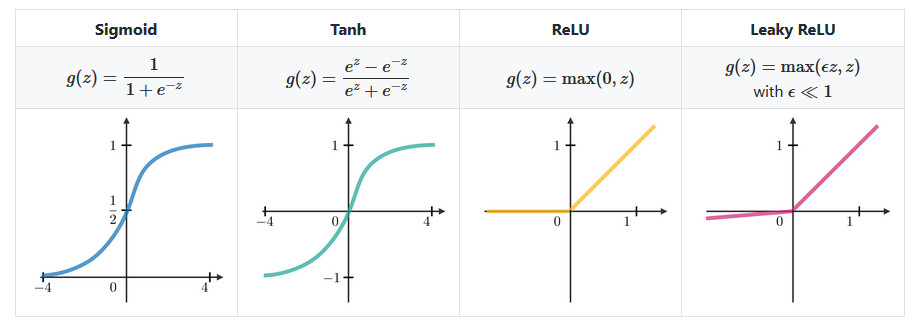
<center>출처:https://stanford.edu/~shervine/teaching/cs-229/</center>

- Sigmoid (logistic function)
    - $$\sigma(z) = \frac 1 {1+e^{-z}}$$
    - $0<sigmoid(z)<1$
    - Output layer에서 확률값을 출력하고자 할 때 주로 사용 

- Hypterbolic tangent
    $$tanh(z) = 2σ(2z) – 1$$
    - $-1<tanh(z)<1$
    - Sigmoid의 이동한 형태
    - Output이 0을 중심으로 분포하므로 sigmoid보다 학습에 효율적  
    
- ReLU(Rectified Linear Unit) - 가장 많이 사용
    $$Relu(z)=max(0,z)$$
    - 최적화 과정에서 gradient가 0과 가까워져 수렴이 느려지는 문제를 해결 
    - 음수를 모두 0으로 처리하는 단점이 있지만 
    - Leaky ReLU, ELU 등 변화된 형태도 있음

- Softmax
    $$\sigma(z_j) = \frac{exp(z_j)}{\sum_{k=1}^K exp(z_k)},  j=1,2, \ldots, K$$
    - 각 class의 score를 정규화 하여 각 class에 대한 확률값으로 변환(sum=1)
    - Multi-class classification 문제의 output layer에서 사용 


- https://www.tensorflow.org/api_docs/python/tf/keras/activations

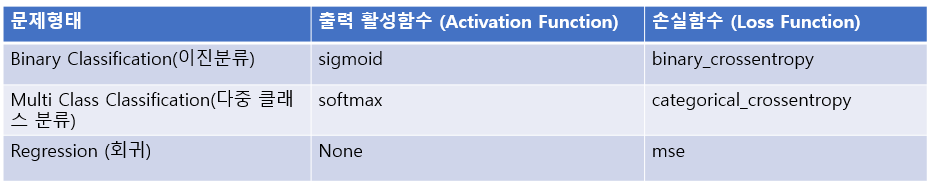


## Optimizer (최적화 방법)

- Loss function을 기반으로 네트워크가 어떻게 업데이트 될지를 결정하는 알고리즘  
- stochastic gradient descent (확률적 경사하강법) 알고리즘을 기반으로 한다.
- 주요 옵티마이저
    - SGD : 확률적 경사하강법. 계산은 빠르지만 최적값을 찾아 가는 방향이 불안정하고 경우에 학습률을 지정이 어렵다.
    - 방향성을 개선한 최적화 방법
        - Momentum
    - 학습률을 개선한 최적화 방법
        - Adagrad
        - RMSProp
    - 방향성 + 학습률 개선 최적화 방법
        - Adam
        
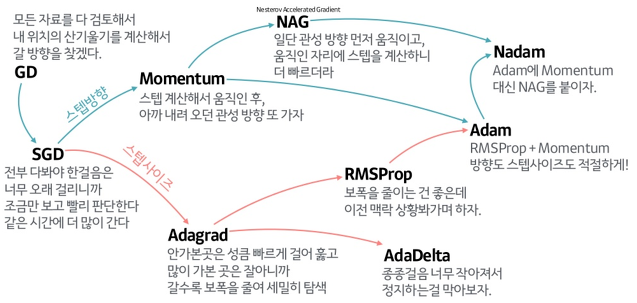
<center>[출처] https://www.slideshare.net/yongho/ss-79607172</center>

- https://www.tensorflow.org/api_docs/python/tf/keras/activations


## 오차를 최소화 하기 위해서는
### 가중치(w)와 편향(b)값을 바꿔야한다. w,b를 파라미터라고 한다.
 - input(x)값과 활성함수는 바꾸지 못함
